# Monte Carlo Simulation

## References
- https://pub.towardsai.net/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
import turtle
import math

## Coin Flip

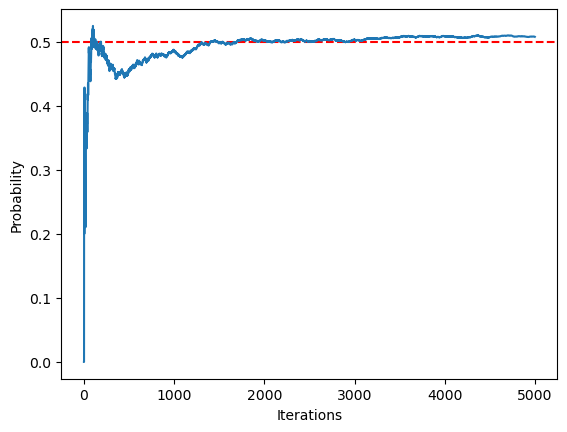

Probability: %0.2f 0.5078


In [19]:
prob_outcomes = []

def coin_flip():
    return random.randint(0,1)

def monte_carlo(n):
    results = 0
    for i in range(n):
        results += coin_flip()
        prob = results/(i + 1)
        prob_outcomes.append(prob)
    
    return results/n

p = monte_carlo(5000)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xlabel("Iterations")
plt.ylabel("Probability")
plt.plot(prob_outcomes)
plt.show()
print('Probability: %0.2f', p)

## Area of a Circle

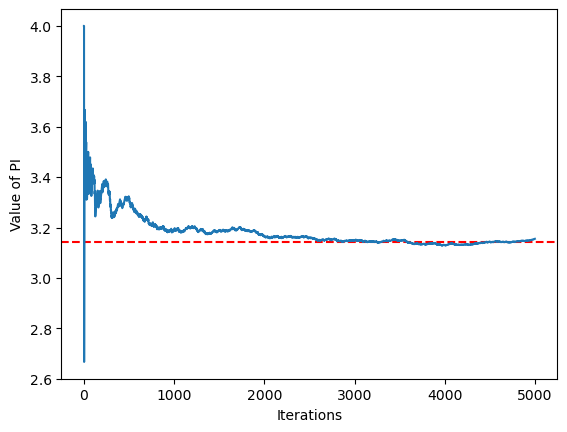

Actual pi: 3.142
 Estimated pi: 3.155


In [20]:
'''
points = turtle.Turtle()
points.hideturtle()
points.speed(0)

# Square
points.up()
points.setposition(-100,-100)
points.down()
points.fd(200)
points.left(90)
points.fd(200)
points.left(90)
points.fd(200)
points.left(90)
points.fd(200)
points.left(90)

# Circle
points.up()
points.setposition(0,-100)
points.down()
points.circle(100)
'''

in_circle = 0
out_circle = 0
pi_values = []

for i in range(5):
    for j in range(1000):
        x = random.randrange(-100,100)
        y = random.randrange(-100,100)

        if (x**2 + y**2 > 100**2):
            #points.color('black')
            out_circle += 1
        else:
            #points.color('red')
            in_circle += 1
        
        '''
        points.up()
        points.goto(x,y)
        points.down()
        points.dot()
        '''

        pi = 4 * in_circle / (in_circle + out_circle)

        pi_values.append(pi)

#turtle.bye()
avg_pi_errors = [abs(math.pi - pi) for pi in pi_values]
plt.axhline(y=math.pi, color='r', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Value of PI')
plt.plot(pi_values)
plt.show()
print('Actual pi: %0.3f\n Estimated pi: %0.3f' %(math.pi, pi_values[-1]))


## Monty Hall Problem

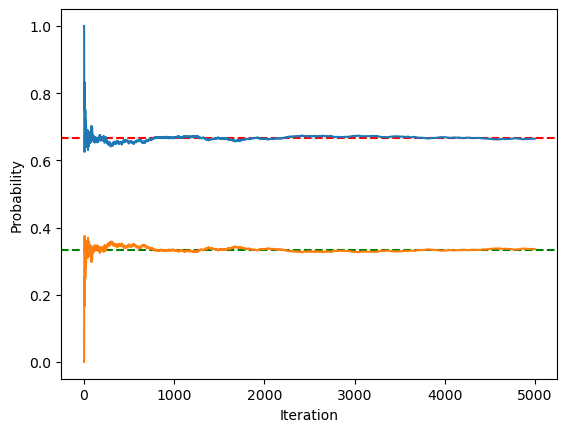

Winning Probability if always switch: 0.665
Winning Probability if always stick: 0.335


In [21]:
doors = ['goat', 'goat', 'car']
switch_win_prob = []
stick_win_prob = []

def monte_carlo(n):
    switch_wins = 0
    stick_wins = 0

    for i in range(n):
        random.shuffle(doors)
        k = random.randrange(2)
        if doors[k] != 'car':
            switch_wins += 1
        else:
            stick_wins += 1

        switch_win_prob.append(switch_wins/(i + 1))
        stick_win_prob.append(stick_wins/(i + 1))

monte_carlo(5000)
plt.axhline(y=2/3, color='r', linestyle='--')
plt.axhline(y=1/3, color='g', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.plot(switch_win_prob)
plt.plot(stick_win_prob)
plt.show()
print('Winning Probability if always switch: %0.3f' % switch_win_prob[-1])
print('Winning Probability if always stick: %0.3f' % stick_win_prob[-1])

## Buffon's Needle Problem

In [22]:
def monte_carlo(runs,needles,n_length,b_width):
    #Empty list to store pi values :
    pi_values = []
    
    #Horizontal line for actual value of PI :
    plt.axhline(y=math.pi, color='r', linestyle='-')
    
    #For all runs :
    for i in range(runs):
        #Initialize number of hits as 0.
        nhits = 0
        
        #For all needles :
        for j in range(needles):
            #We will find the distance from the nearest vertical line :
            #Min = 0     Max = b_width/2
            x = random.uniform(0,b_width/2.0)
            
            #The theta value will be from 0 to pi/2 :
            theta = random.uniform(0,math.pi/2)
            
            #Checking if the needle crosses the line or not :
            xtip  = x - (n_length/2.0)*math.cos(theta)  
            if xtip < 0 :
                nhits += 1
                
        #Going with the formula :
        numerator = 2.0 * n_length * needles
        denominator = b_width * nhits
       
        #Append the final value of pi :
        pi_values.append((numerator/denominator))
    
    #Final pi value after all iterations :
    print(pi_values[-1])
    
    #Plotting the graph :
    plt.plot(pi_values)    
        
#Total number of runs :
runs = 100

#Total number of needles :
needles = 100000

#Length of needle :
n_length = 2  

#space between 2 verical lines :
b_width =2

#Calling the main function :
monte_carlo(runs,needles,n_length,b_width)

3.151641217163838


## House Wins

In [23]:
"""RULES : 
1) There are chits containing numbers ranging from 1-100 in a bag.
2) Users can bet on even or odd.
3) In this game 10 and 11 are special numbers. 10 will be counted as an odd number and 11 will be counted as an even number.
4) If you bet on even number and if you get 10 then you lose.
5) If you bet on odd number and if you get 11 then you lose.
"""

#Place your bet:

#User can choose even or odd number :
choice = input("Do you want to bet on Even number or odd number \n")

#For even :
if choice=="Even":
    def pickNote():
        #Get random number between 1-100.
        note = random.randint(1,100)
       
        #Check for our game conditions.
        
        #Notice that 10 isn't considered as even number.
        if note%2!=0 or note==10:
            return False
        elif note%2==0:
            return True

#For odd :        
elif choice=="Odd":
    def pickNote():
        #Get random number between 1-100.
        note = random.randint(1,100)
        
        #Check for our game conditions.
        
        #Notice that 11 isn't considered as odd number.
        if note%2==0 or note==11:
            return False
        elif note%2==1:
            return True  
            
#Main function :
def play(total_money, bet_money, total_plays):

    num_of_plays = []
    money = []
    
    #Start with play number 1
    play = 1
  
    for play in range(total_plays):
        #Win :
        if pickNote():
            #Add the money to our funds
            total_money = total_money + bet_money
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
        
        #Lose :
        else:
            #Add the money to our funds
            total_money = total_money - bet_money 
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
    
    #Plot the data :
    plt.ylabel('Player Money in $')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays,money)

    #Final value after all the iterations :
    final_funds.append(money[-1])
    return(final_funds)
    
    #Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,50)
    
print(ending_fund)
print(sum(ending_fund))

#Print the money the player ends with
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

#Create a list for calculating final funds
final_funds= []

#Run 1000 iterations :
for i in range(1000):
    ending_fund = play(10000,100,50)

#Print the money the player ends with
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,5)

#Print the money the player ends with
print("Number of bets = 5")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,10)

#Print the money the player ends with
print("Number of bets = 10")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,100)

#Print the money the player ends with
print("Number of bets = 100")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,1000)

#Print the money the player ends with
print("Number of bets = 1000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,5000)

#Print the money the player ends with
print("Number of bets = 5000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,10000)

#Print the money the player ends with
print("Number of bets = 10000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

[10200, 10200, 10600, 10400, 10800, 9800, 10400, 10200, 10600, 9800]
103000
The player started with $10,000
The player left with $ 10300.0
The player started with $10,000
The player left with $ 9910.0
Number of bets = 5
The player started with $10,000
The player left with $ 10060.0
Number of bets = 10
The player started with $10,000
The player left with $ 10000.0
Number of bets = 100
The player started with $10,000
The player left with $ 9420.0
Number of bets = 1000
The player started with $10,000
The player left with $ 6900.0
Number of bets = 5000
The player started with $10,000
The player left with $ 2340.0
Number of bets = 10000
The player started with $10,000
The player left with $ -10320.0
